In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from matplotlib.widgets import Slider

In [2]:
t = np.arange(0, 100, 0.001)

# strain function
def h(m1, m2, r=1):
    Mc = (m1*m2)**(3/5)/(m1+m2)**(1/5)
    t_c = (1/(40*np.pi))**(8/3)*5/256*(const.gravitational_constant*Mc*1.9891*10**30/const.c**3)**(-5/3)

    tau = t_c - t

    phi = -2*(5*const.gravitational_constant*Mc*1.9891*10**30/const.c**3)**(-5/8)*tau**(5/8)
    Mpc = 3.085678*10**22
    
    h_p = 1/(r*Mpc)*(const.gravitational_constant*Mc*1.9891*10**30/const.c**2)**(5/4)*(5/(const.c*tau))**(1/4)*np.cos(phi)

    #h_x = 1/(r*Mpc)*(const.gravitational_constant*Mc*1.9891*10**30/const.c**2)**(5/4)*(5/(const.c*tau))**(1/4)*np.sin(phi)
    return h_p

<IPython.core.display.Javascript object>


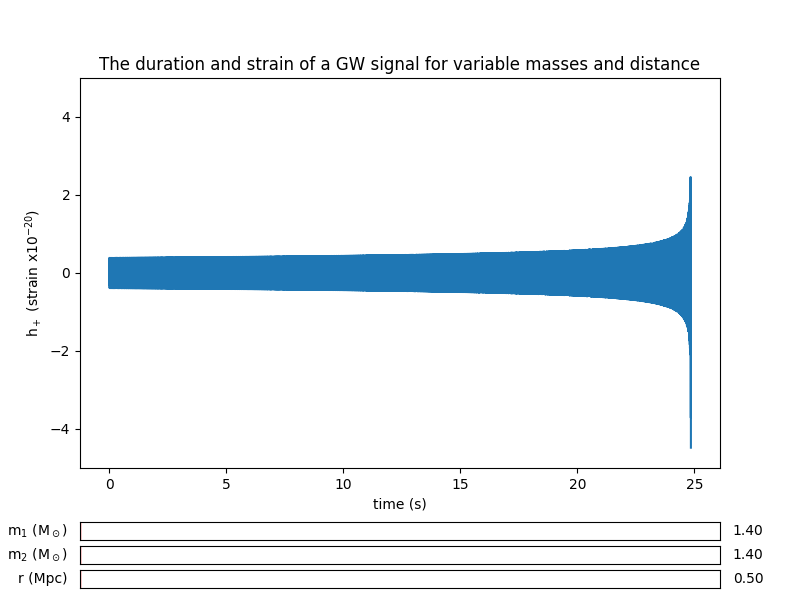

/home/jagoras/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/home/jagoras/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in power
  # Remove the CWD from sys.path while we load stuff.
/home/jagoras/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in power
  del sys.path[0]


In [3]:
# for interactive plots
%matplotlib notebook
# %matplotlib inline # use this for older versions of python

a_init = 1.4
b_init = 1.4
c_init = 0.5

fig = plt.figure(figsize=(8,6))

# general layout of the figure
h_ax = plt.axes([0.1, 0.22, 0.8, 0.65])
slider_ax1 = plt.axes([0.1, 0.06, 0.8, 0.03])
slider_ax2 = plt.axes([0.1, 0.1, 0.8, 0.03])
slider_ax3 = plt.axes([0.1, 0.02, 0.8, 0.03])


# in plot_ax we plot the function with the initial value of the parameter a
plt.axes(h_ax)
plt.title('The duration and strain of a GW signal for variable masses and distance')
h_plot, = plt.plot(t, 10**20* h(a_init, b_init, c_init))
plt.xlabel('time (s)')
plt.ylabel('h$_+$ (strain x10$^{-20}$)')
# plt.xlim(0, 2)
plt.ylim(-5, 5)

# create the slider
a_slider = Slider(slider_ax1, 'm$_2$ (M$_\odot$)', 1.4, 15, valinit=a_init)
b_slider = Slider(slider_ax2, 'm$_1$ (M$_\odot$)', 1.4, 15, valinit=b_init)
c_slider = Slider(slider_ax3, 'r (Mpc)', 0.5, 10, valinit=c_init)


# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(val):
    m2 = a_slider.val
    m1 = b_slider.val
    d = c_slider.val
    h_plot.set_ydata(10**20*h(m1, m2, d)) # set new y-coordinates of the plotted points
    fig.canvas.draw_idle()          # redraw the plot


a_slider.on_changed(update)
b_slider.on_changed(update)
c_slider.on_changed(update)

plt.show()

In [16]:
#plt.savefig('snap6.png')